In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import plotly.express as px
import datetime
import requests
import json

In [2]:
df = pd.read_csv("Missisipi_River.csv")
df.head()

,Turbidity(Mean),Gage_Height(Mean),Temperature(Mean),Specific_Conductance(Mean),Salinity(Mean),pH(Median),Discharge(Mean),Dissolved_Oxygen(Mean),Nitrate(Mean)
0,94.8,27.56,7.9,346.0,0.2,7.8,666000.0,10.9,1.22
1,97.0,27.78,8.0,336.0,0.2,7.8,672000.0,10.8,1.22
2,89.3,28.39,8.3,322.0,0.2,7.8,689000.0,10.7,1.21
3,109.0,28.81,8.6,311.0,0.2,7.8,703000.0,10.6,1.18
4,96.7,28.90,8.9,309.0,0.2,7.8,705000.0,10.4,1.17


In [3]:
data = df.copy()

In [4]:
df.shape

(1096, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Turbidity(Mean)             1078 non-null   float64
 1   Gage_Height(Mean)           1086 non-null   float64
 2   Temperature(Mean)           1079 non-null   float64
 3   Specific_Conductance(Mean)  1045 non-null   float64
 4   Salinity(Mean)              1045 non-null   float64
 5   pH(Median)                  1014 non-null   float64
 6   Discharge(Mean)             1094 non-null   float64
 7   Dissolved_Oxygen(Mean)      1088 non-null   float64
 8   Nitrate(Mean)               1026 non-null   float64
dtypes: float64(9)
memory usage: 77.2 KB


In [6]:
df.isnull().sum()

Turbidity(Mean)               18
Gage_Height(Mean)             10
Temperature(Mean)             17
Specific_Conductance(Mean)    51
Salinity(Mean)                51
pH(Median)                    82
Discharge(Mean)                2
Dissolved_Oxygen(Mean)         8
Nitrate(Mean)                 70
dtype: int64

In [7]:
df = df.dropna()
df.shape

(921, 9)

In [8]:
df.head()

,Turbidity(Mean),Gage_Height(Mean),Temperature(Mean),Specific_Conductance(Mean),Salinity(Mean),pH(Median),Discharge(Mean),Dissolved_Oxygen(Mean),Nitrate(Mean)
0,94.8,27.56,7.9,346.0,0.2,7.8,666000.0,10.9,1.22
1,97.0,27.78,8.0,336.0,0.2,7.8,672000.0,10.8,1.22
2,89.3,28.39,8.3,322.0,0.2,7.8,689000.0,10.7,1.21
3,109.0,28.81,8.6,311.0,0.2,7.8,703000.0,10.6,1.18
4,96.7,28.90,8.9,309.0,0.2,7.8,705000.0,10.4,1.17


In [9]:
df.describe()

,Turbidity(Mean),Gage_Height(Mean),Temperature(Mean),Specific_Conductance(Mean),Salinity(Mean),pH(Median),Discharge(Mean),Dissolved_Oxygen(Mean),Nitrate(Mean)
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,9.210000e+02,921.000000,921.000000
mean,46.465581,23.139088,19.183062,370.186754,0.188817,7.807926,6.143236e+05,8.197937,1.117253
std,25.170181,11.072920,8.216463,57.904080,0.031876,0.136063,3.122322e+05,1.903905,0.363360
min,12.100000,7.000000,5.600000,262.000000,0.100000,7.500000,2.030000e+05,5.400000,0.380000
25%,28.100000,12.810000,11.800000,321.000000,0.200000,7.700000,3.450000e+05,6.400000,0.890000
50%,41.200000,21.310000,19.000000,372.000000,0.200000,7.800000,5.300000e+05,7.700000,1.120000
75%,56.700000,32.750000,27.900000,414.000000,0.200000,7.900000,8.410000e+05,10.100000,1.320000
max,197.000000,44.540000,31.200000,508.000000,0.300000,8.200000,1.360000e+06,12.300000,2.220000


In [10]:
df.isnull().sum()

Turbidity(Mean)               0
Gage_Height(Mean)             0
Temperature(Mean)             0
Specific_Conductance(Mean)    0
Salinity(Mean)                0
pH(Median)                    0
Discharge(Mean)               0
Dissolved_Oxygen(Mean)        0
Nitrate(Mean)                 0
dtype: int64

In [11]:
df.dtypes

Turbidity(Mean)               float64
Gage_Height(Mean)             float64
Temperature(Mean)             float64
Specific_Conductance(Mean)    float64
Salinity(Mean)                float64
pH(Median)                    float64
Discharge(Mean)               float64
Dissolved_Oxygen(Mean)        float64
Nitrate(Mean)                 float64
dtype: object

In [12]:
df.duplicated().sum()

0

In [13]:
df.corr()

,Turbidity(Mean),Gage_Height(Mean),Temperature(Mean),Specific_Conductance(Mean),Salinity(Mean),pH(Median),Discharge(Mean),Dissolved_Oxygen(Mean),Nitrate(Mean)
Turbidity(Mean),1.000000,0.235559,-0.248506,-0.302262,-0.030881,-0.325153,0.131506,0.168921,0.186537
Gage_Height(Mean),0.235559,1.000000,-0.341047,-0.847245,-0.465704,-0.723315,0.985827,0.170346,0.411942
Temperature(Mean),-0.248506,-0.341047,1.000000,0.497395,0.347346,0.021734,-0.359539,-0.967233,0.043700
Specific_Conductance(Mean),-0.302262,-0.847245,0.497395,1.000000,0.540086,0.693572,-0.836517,-0.344697,-0.085231
Salinity(Mean),-0.030881,-0.465704,0.347346,0.540086,1.000000,0.326208,-0.512786,-0.290525,0.000160
pH(Median),-0.325153,-0.723315,0.021734,0.693572,0.326208,1.000000,-0.682052,0.173186,-0.151852
Discharge(Mean),0.131506,0.985827,-0.359539,-0.836517,-0.512786,-0.682052,1.000000,0.196332,0.360698
Dissolved_Oxygen(Mean),0.168921,0.170346,-0.967233,-0.344697,-0.290525,0.173186,0.196332,1.000000,-0.090812
Nitrate(Mean),0.186537,0.411942,0.043700,-0.085231,0.000160,-0.151852,0.360698,-0.090812,1.000000


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

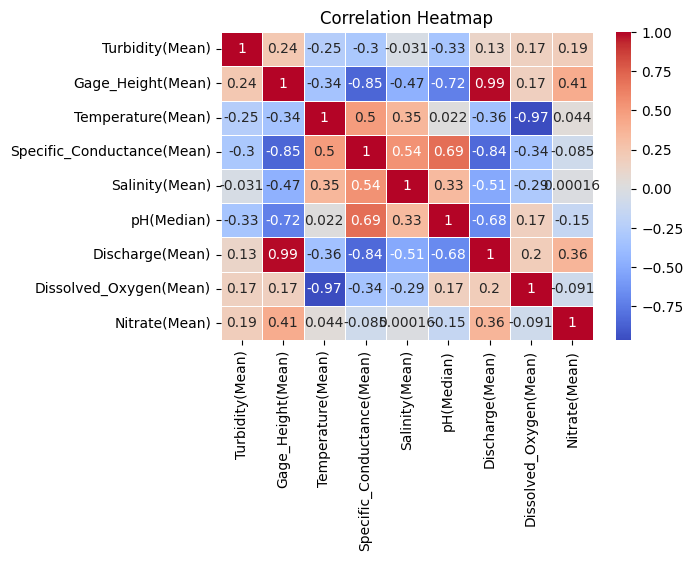

In [15]:
plt.figure(figsize=(6, 4))

# Create a heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.title("Correlation Heatmap")
plt.show()

In [16]:
features = df.corr()['Temperature(Mean)'].sort_values()
features

Dissolved_Oxygen(Mean)       -0.967233
Discharge(Mean)              -0.359539
Gage_Height(Mean)            -0.341047
Turbidity(Mean)              -0.248506
pH(Median)                    0.021734
Nitrate(Mean)                 0.043700
Salinity(Mean)                0.347346
Specific_Conductance(Mean)    0.497395
Temperature(Mean)             1.000000
Name: Temperature(Mean), dtype: float64

In [17]:
features = df.corr()['Dissolved_Oxygen(Mean)'].sort_values()
features

Temperature(Mean)            -0.967233
Specific_Conductance(Mean)   -0.344697
Salinity(Mean)               -0.290525
Nitrate(Mean)                -0.090812
Turbidity(Mean)               0.168921
Gage_Height(Mean)             0.170346
pH(Median)                    0.173186
Discharge(Mean)               0.196332
Dissolved_Oxygen(Mean)        1.000000
Name: Dissolved_Oxygen(Mean), dtype: float64

<Axes: >

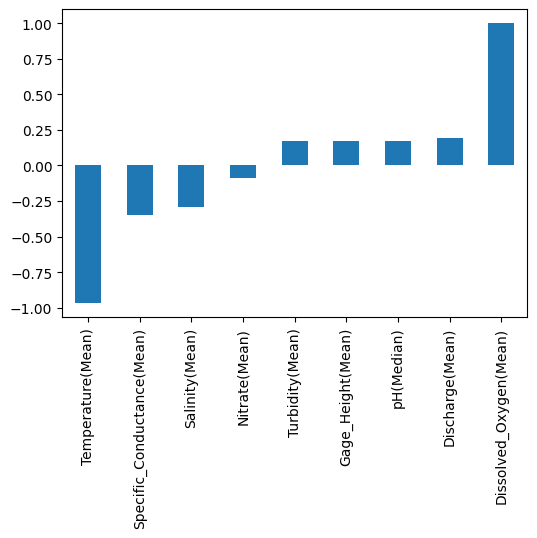

In [18]:
features.plot(kind='bar',figsize=(6,4))

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

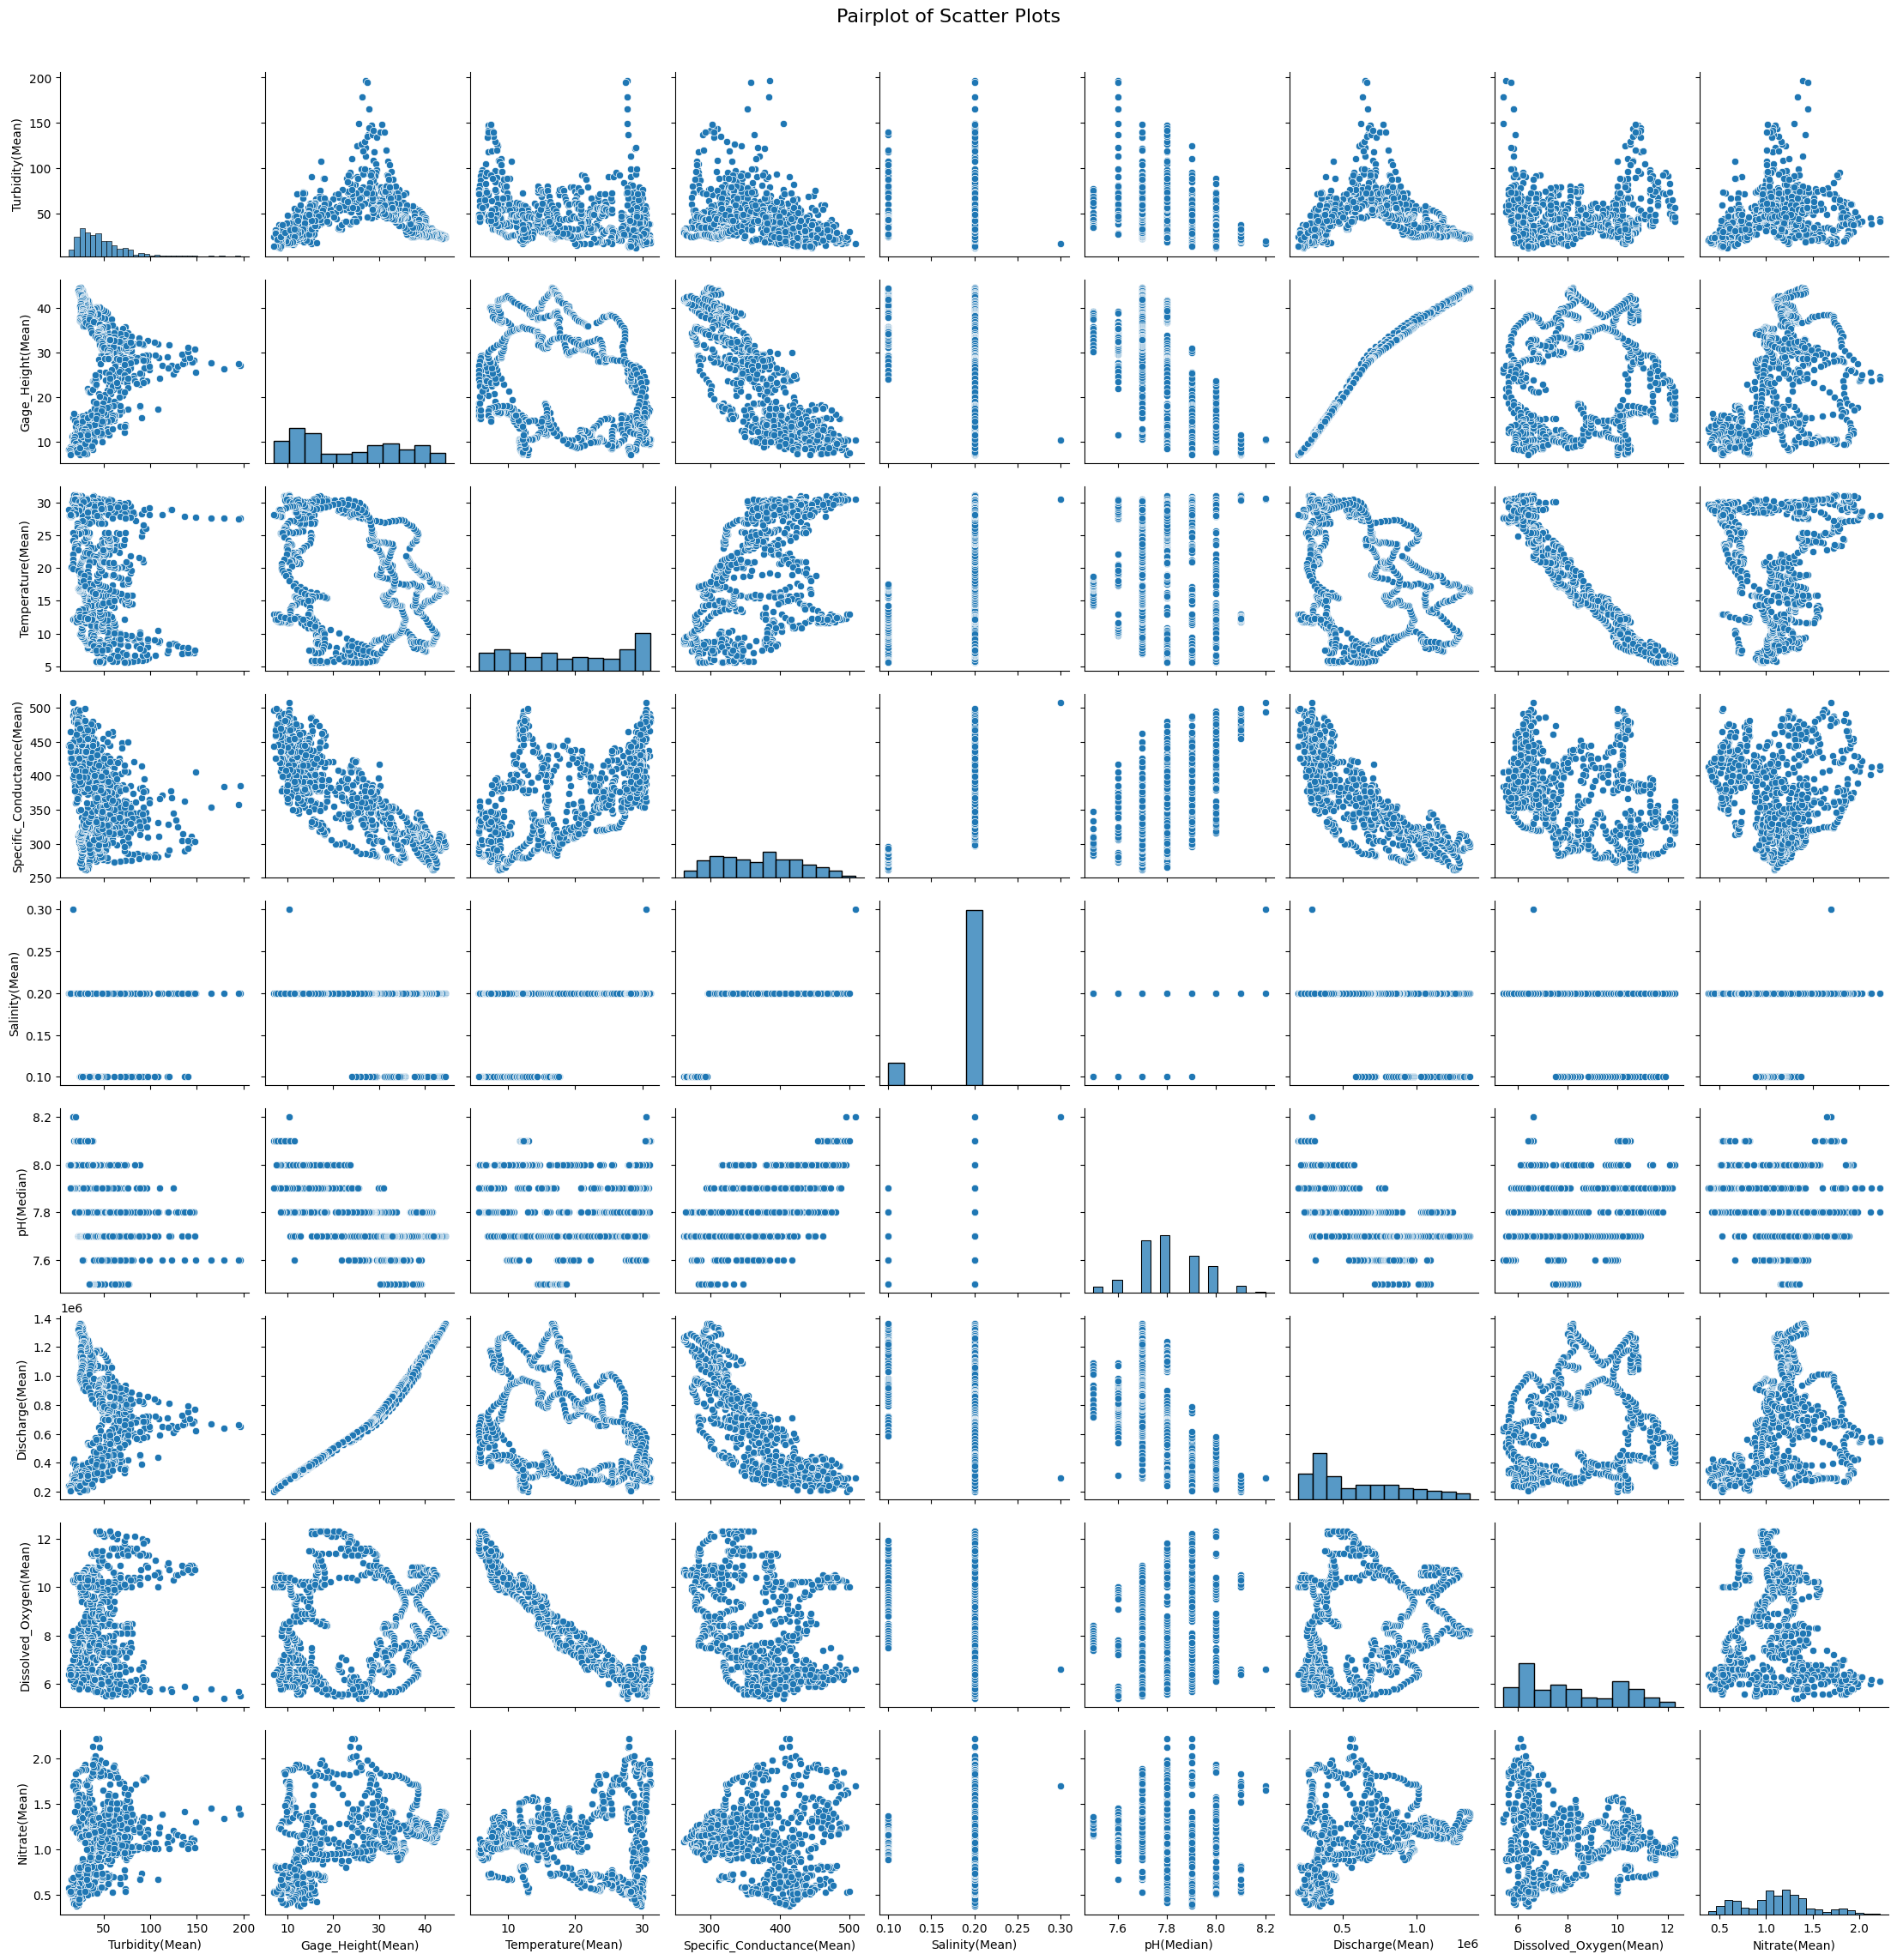

In [20]:
g = sns.pairplot(df)
plt.suptitle("Pairplot of Scatter Plots", y=1.02, fontsize=16)
plt.show()

#### **Residual plot**
Residual Plot A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

##### **PValue**

In [21]:
from scipy import stats

##### p-value is < 0.001: we say there is strong evidence that the correlation is significant.

the p-value is < 0.05: there is moderate evidence that the correlation is significant. the p-value is < 0.1: there is weak evidence that the correlation is significant. the p-value is

0.1: there is no evidence that the correlation is significant.

In [22]:
pearson_coef, p_value = stats.pearsonr(df['Temperature(Mean)'], df['Dissolved_Oxygen(Mean)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.9672334242927062  with a P-value of P = 0.0


#### **Evaluation**
Mean square error(MSE)
MSE = (1/n) * Σ(yi - ŷi)^2

Absolute Mean Squared Error (AMSE):
AMSE = (1/n) * Σ|yi - ŷi|

Root Mean Squared Error (RMSE):
RMSE = √((1/n) * Σ(yi - ŷi)^2)

#### **POLYNOMIAL REGRESSION**

In [23]:
df.head()

,Turbidity(Mean),Gage_Height(Mean),Temperature(Mean),Specific_Conductance(Mean),Salinity(Mean),pH(Median),Discharge(Mean),Dissolved_Oxygen(Mean),Nitrate(Mean)
0,94.8,27.56,7.9,346.0,0.2,7.8,666000.0,10.9,1.22
1,97.0,27.78,8.0,336.0,0.2,7.8,672000.0,10.8,1.22
2,89.3,28.39,8.3,322.0,0.2,7.8,689000.0,10.7,1.21
3,109.0,28.81,8.6,311.0,0.2,7.8,703000.0,10.6,1.18
4,96.7,28.90,8.9,309.0,0.2,7.8,705000.0,10.4,1.17


In [24]:
df.isnull().sum()

Turbidity(Mean)               0
Gage_Height(Mean)             0
Temperature(Mean)             0
Specific_Conductance(Mean)    0
Salinity(Mean)                0
pH(Median)                    0
Discharge(Mean)               0
Dissolved_Oxygen(Mean)        0
Nitrate(Mean)                 0
dtype: int64

In [25]:
x = df[['Temperature(Mean)']]
y = df[['Dissolved_Oxygen(Mean)']]

In [26]:
x.shape

(921, 1)

In [27]:
y.shape

(921, 1)

##### **Scatter Plot for Temperature (Mean) vs. Dissolved Oxygen(Mean)**

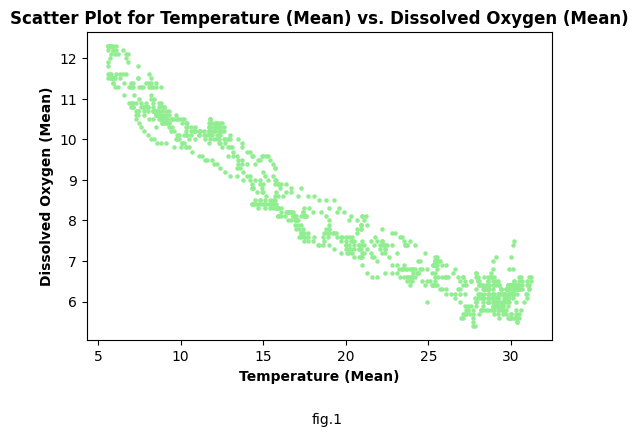

In [28]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='lightgreen', marker='o', s=5)
plt.title("Scatter Plot for Temperature (Mean) vs. Dissolved Oxygen (Mean)", fontsize=12, fontweight="bold")
plt.xlabel("Temperature (Mean)", fontsize=10, fontweight="bold")
plt.ylabel("Dissolved Oxygen (Mean)", fontsize=10, fontweight="bold")


##Figure position
# Calculate the position for "Fig. 1" to move it closer to the graph
text_x = 0.5  # Centered horizontally
text_y = -0.10  # Closer to the graph

# Add "Fig. 1" closer to the figure
plt.figtext(text_x, text_y, "fig.1", fontsize=10, color='black')

plt.show()

#### **Histogram for Dissolved Oxygen (Mean)**

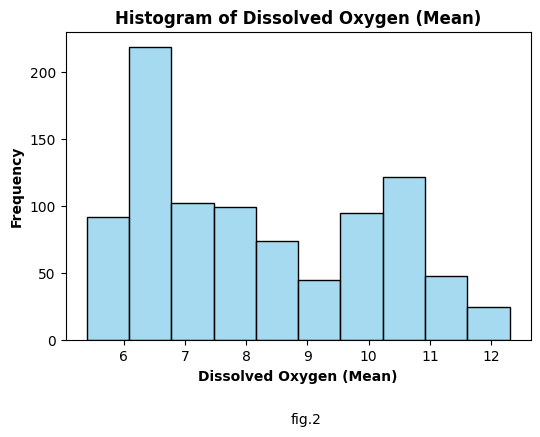

In [29]:
# Set the figure size
plt.figure(figsize=(6, 4))
# Create a histogram
sns.histplot(df["Dissolved_Oxygen(Mean)"], color='skyblue', bins=10)  # Adjust the number of bins as needed

# Add labels and a title
plt.xlabel("Dissolved Oxygen (Mean)", fontsize=10, fontweight="bold")
plt.ylabel("Frequency", fontsize=10, fontweight="bold")
plt.title("Histogram of Dissolved Oxygen (Mean)", fontsize=12, fontweight="bold")



##Figure position
# Calculate the position for "Fig. 1" to move it closer to the graph
text_x = 0.5  # Centered horizontally
text_y = -0.10  # Closer to the graph

# Add "Fig. 1" closer to the figure
plt.figtext(text_x, text_y, "fig.2", fontsize=10, color='black')

plt.show()

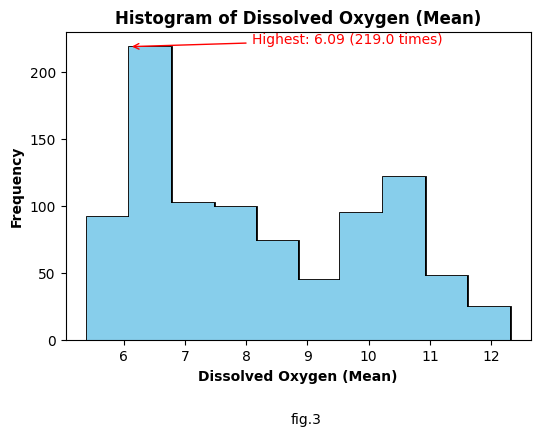

In [30]:

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with a column 'phmean'
meandissolvedoxygen_data = df["Dissolved_Oxygen(Mean)"]

# Set the figure size
plt.figure(figsize=(6, 4))

# Create a histogram with custom fill color
plt.hist(meandissolvedoxygen_data, bins=10, linewidth=2, edgecolor='black', color='pink')

# Add labels and a title
plt.xlabel("Dissolved Oxygen (Mean)", fontsize=10, fontweight="bold")
plt.ylabel("Frequency", fontsize=10, fontweight="bold")
plt.title("Histogram of Dissolved Oxygen (Mean)", fontsize=12, fontweight="bold")

# Find the highest bin and its frequency
counts, bin_edges, _ = plt.hist(meandissolvedoxygen_data, bins=10, color='skyblue')
highest_bin_idx = counts.argmax()
highest_bin_frequency = counts[highest_bin_idx]
highest_bin_value = bin_edges[highest_bin_idx]

# Annotate the highest bin
plt.annotate(f'Highest: {highest_bin_value:.2f} ({highest_bin_frequency} times)',
             xy=(highest_bin_value, highest_bin_frequency),
             xytext=(highest_bin_value + 2, highest_bin_frequency + 2),  # Adjust the text position
             arrowprops=dict(arrowstyle='->', color='red'), color='red')

##Figure position
# Calculate the position for "Fig. 1" to move it closer to the graph
text_x = 0.5  # Centered horizontally
text_y = -0.10  # Closer to the graph

# Add "Fig. 1" closer to the figure
plt.figtext(text_x, text_y, "fig.3", fontsize=10, color='black')

plt.show()

#### **Histogram for Temperature (Mean)**

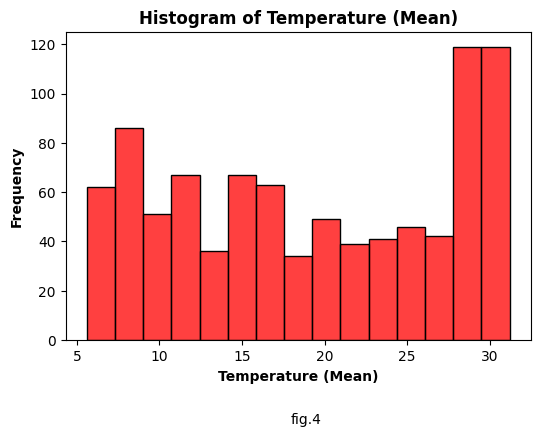

In [31]:
# Set the figure size
plt.figure(figsize=(6, 4))

# Create a histogram
sns.histplot(df["Temperature(Mean)"], color='red', bins=15)  # Adjust the number of bins as needed

# Add labels and a title
plt.xlabel("Temperature (Mean)", fontsize=10, fontweight="bold")
plt.ylabel("Frequency", fontsize=10, fontweight="bold")
plt.title("Histogram of Temperature (Mean)", fontsize=12, fontweight="bold")


##Figure position
# Calculate the position for "Fig. 1" to move it closer to the graph
text_x = 0.5  # Centered horizontally
text_y = -0.10  # Closer to the graph

# Add "Fig. 1" closer to the figure
plt.figtext(text_x, text_y, "fig.4", fontsize=10, color='black')

plt.show()

#### **Line plot for Temperature (Mean) Values**

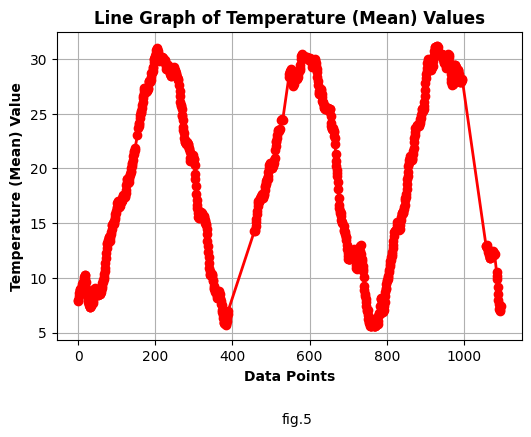

In [32]:
meantemp_data = df["Temperature(Mean)"]

# Set the figure size to control the width and height
plt.figure(figsize=(6, 4))  # Set the figure size (width, height)

# Create a line graph for pH values with a custom color, marker, and line style
plt.plot(meantemp_data, marker='o', linestyle='-', color='red', linewidth=2)

plt.xlabel('Data Points', fontsize=10, fontweight="bold")
plt.ylabel('Temperature (Mean) Value', fontsize=10, fontweight="bold")
plt.title('Line Graph of Temperature (Mean) Values', fontsize=12, fontweight="bold")
plt.grid(True)  # Add a grid

##Figure position
# Calculate the position for "Fig. 1" to move it closer to the graph
text_x = 0.5  # Centered horizontally
text_y = -0.10  # Closer to the graph

# Add "Fig. 1" closer to the figure
plt.figtext(text_x, text_y, "fig.5", fontsize=10, color='black')

plt.show()

#### **Joint Plot**

<Figure size 600x400 with 0 Axes>

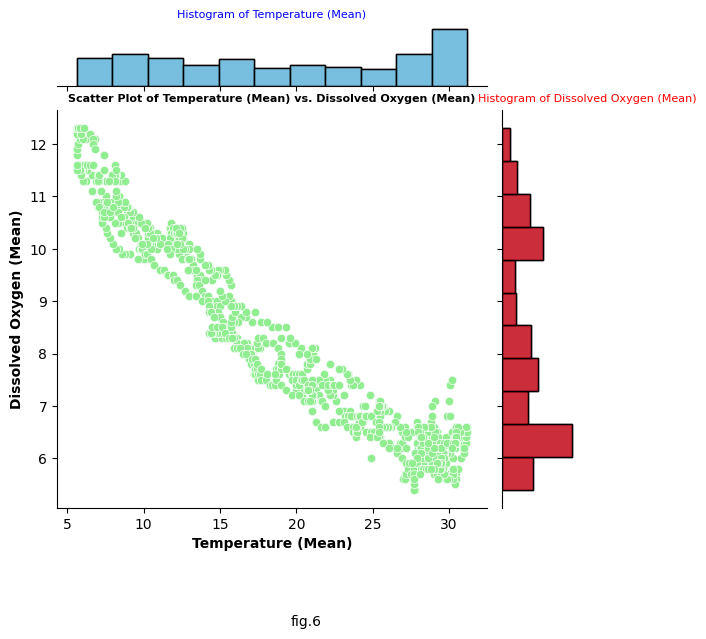

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
# Create the joint plot without a merged scatter plot color
joint_plot = sns.jointplot(x="Temperature(Mean)", y="Dissolved_Oxygen(Mean)", data=df, kind="scatter")

# Customize the scatter plot color
joint_plot.plot_joint(sns.scatterplot, color='lightgreen')

# Customize the histogram colors and plot them on separate axes
sns.histplot(data=df, x="Temperature(Mean)", color='skyblue', ax=joint_plot.ax_marg_x, alpha=0.7)
sns.histplot(data=df, y="Dissolved_Oxygen(Mean)", color='red', ax=joint_plot.ax_marg_y, alpha=0.7)

# Customize the histogram titles
joint_plot.ax_marg_x.set_title("Histogram of Temperature (Mean)", fontsize=8, color='blue')
joint_plot.ax_marg_y.set_title("Histogram of Dissolved Oxygen (Mean)", fontsize=8, color='red')

# Set labels and title for the joint plot
joint_plot.ax_joint.set_xlabel("Temperature (Mean)", fontsize=10, fontweight="bold")
joint_plot.ax_joint.set_ylabel("Dissolved Oxygen (Mean)", fontsize=10, fontweight="bold")
joint_plot.ax_joint.set_title("Scatter Plot of Temperature (Mean) vs. Dissolved Oxygen (Mean)", color='black', fontsize=8, fontweight="bold")

# Adjust the spacing between subplots and the main title
plt.subplots_adjust(top=0.9, hspace=0.4)

# Adjust the position of the histogram title to the right
joint_plot.ax_marg_y.title.set_position([1.16, 0.5])


##Figure position
# Calculate the position for "Fig. 1" to move it closer to the graph
text_x = 0.5  # Centered horizontally
text_y = -0.10  # Closer to the graph

# Add "Fig. 1" closer to the figure
plt.figtext(text_x, text_y, "fig.6", fontsize=10, color='black')

plt.show()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape

(736, 1)

In [37]:
poly = PolynomialFeatures(degree=3)  # You can change the degree as needed
x_train_poly = poly.fit_transform(X_train)
x_test_poly = poly.transform(X_test)

In [38]:
x_train_poly.shape

(736, 4)

In [39]:
x_test_poly.shape

(185, 4)

In [40]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

In [41]:
y_pred = model.predict(x_test_poly)

In [42]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - y_pred))

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae.mean():.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')

Mean Squared Error (MSE): 0.14
Root Mean Squared Error (RMSE): 0.38
Mean Absolute Error (MAE): 0.31
R-squared (R²) Score: 0.96


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


##### **Mean Squared Error (MSE): 0.14**
##### **Root Mean Squared Error (RMSE): 0.38**
##### **Mean Absolute Error (MAE): 0.31**
##### **R-squared (R²) Score: 0.96**

In [43]:
model.intercept_

array([13.5032488])

In [44]:
model.coef_

array([[ 0.00000000e+00, -3.01763021e-01, -2.84628947e-03,
         1.57437389e-04]])

**Equation of Polynomial line  y = 1.57437389e-04x^3 - 2.84628947e-03x^2 - 3.01763021e-01x^1 + 0x^0 + 13.5032488**

#### **Polynomial regression line using Test dataset**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


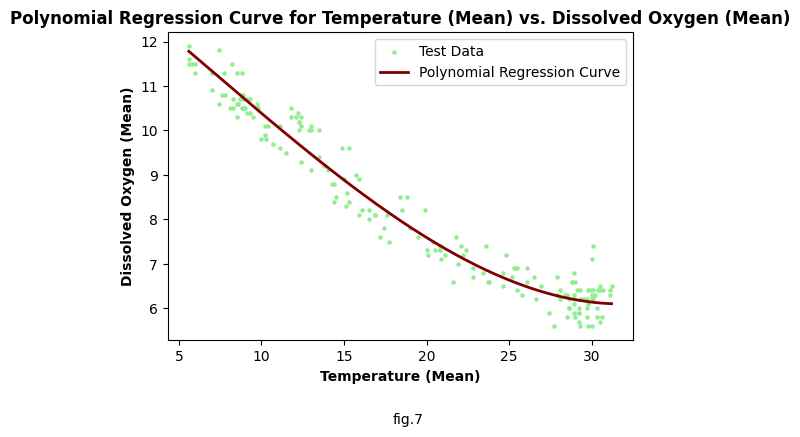

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


plt.figure(figsize=(6, 4))

x = df[['Temperature(Mean)']]
y = df[['Dissolved_Oxygen(Mean)']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

# Create the polynomial features
degree = 3  # Adjust the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict 'turbidity' for the test data
y_pred = model.predict(X_test_poly)

# Plot the scatter plot of test data
plt.scatter(X_test, y_test, label='Test Data', color='lightgreen', s=5)

# Generate a high-resolution range for x-values
x_values = np.linspace(min(X_test.values), max(X_test.values), 1000)  # Increase the number of points (e.g., 1000)

# Predict 'turbidity' for the high-resolution x-values
x_values_poly = poly_features.transform(x_values.reshape(-1, 1))
y_pred_curve = model.predict(x_values_poly)

# Plot the polynomial regression curve
plt.plot(x_values, y_pred_curve, label='Polynomial Regression Curve', color='maroon', linewidth=2)

# Add labels and a title
plt.xlabel('Temperature (Mean)', fontsize=10, fontweight="bold")
plt.ylabel('Dissolved Oxygen (Mean)', fontsize=10, fontweight="bold")
plt.title('Polynomial Regression Curve for Temperature (Mean) vs. Dissolved Oxygen (Mean)', fontsize=12, fontweight="bold")

# Add a legend
plt.legend()

##Figure position
# Calculate the position for "Fig. 1" to move it closer to the graph
text_x = 0.5  # Centered horizontally
text_y = -0.10  # Closer to the graph

# Add "Fig. 1" closer to the figure
plt.figtext(text_x, text_y, "fig.7", fontsize=10, color='black')

plt.show()

#### **Distribution Plot**

<ipython-input-51-05c115a9b1ce>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color='purple', label="Actual value")
<ipython-input-51-05c115a9b1ce>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="orange", label="fitted va

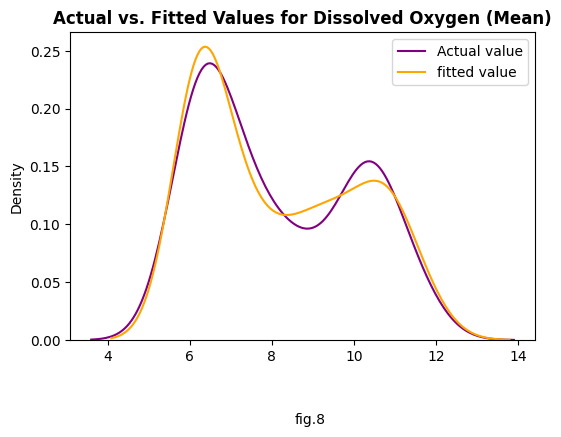

In [51]:
plt.figure(figsize=(6, 4))

ax1 = sns.distplot(y_test, hist=False, color='purple', label="Actual value")

sns.distplot(y_pred, hist=False, color="orange", label="fitted value", ax=ax1)

plt.title('Actual vs. Fitted Values for Dissolved Oxygen (Mean)', fontsize=12, fontweight="bold")

# Add a legend
plt.legend()

##Figure position
# Calculate the position for "Fig. 1" to move it closer to the graph
text_x = 0.5  # Centered horizontally
text_y = -0.10  # Closer to the graph

# Add "Fig. 1" closer to the figure
plt.figtext(text_x, text_y, "fig.8", fontsize=10, color='black')

plt.show()

#### **Polynomial regression line using Train dataset**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


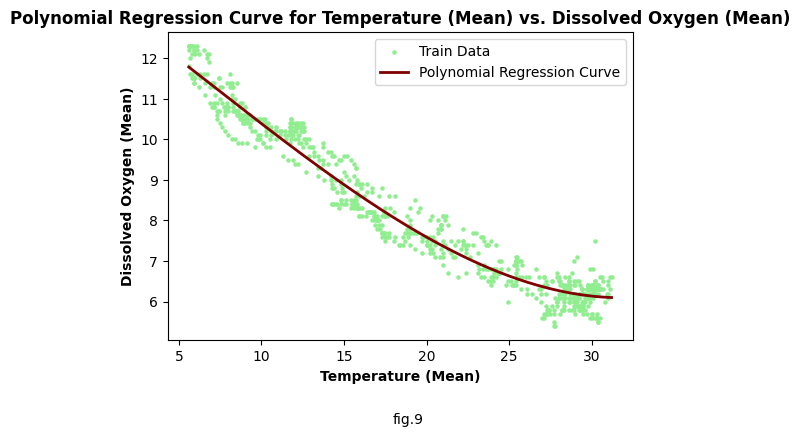

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

plt.figure(figsize=(6, 4))

x = df[['Temperature(Mean)']]
y = df[['Dissolved_Oxygen(Mean)']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

# Create the polynomial features
degree = 3  # Adjust the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict 'turbidity' for the test data
y_pred = model.predict(X_test_poly)

# Plot the scatter plot of test data
plt.scatter(X_train, y_train, label='Train Data', color='lightgreen', s=5)

# Generate a high-resolution range for x-values
x_values = np.linspace(min(X_train.values), max(X_train.values), 1000)  # Increase the number of points (e.g., 1000)

# Predict 'turbidity' for the high-resolution x-values
x_values_poly = poly_features.transform(x_values.reshape(-1, 1))
y_pred_curve = model.predict(x_values_poly)

# Plot the polynomial regression curve
plt.plot(x_values, y_pred_curve, label='Polynomial Regression Curve', color='maroon', linewidth=2)

# Add labels and a title
plt.xlabel('Temperature (Mean)', fontsize=10, fontweight="bold")
plt.ylabel('Dissolved Oxygen (Mean)', fontsize=10, fontweight="bold")
plt.title('Polynomial Regression Curve for Temperature (Mean) vs. Dissolved Oxygen (Mean)', fontsize=12, fontweight="bold")

# Add a legend
plt.legend()

##Figure position
# Calculate the position for "Fig. 1" to move it closer to the graph
text_x = 0.5  # Centered horizontally
text_y = -0.10  # Closer to the graph

# Add "Fig. 1" closer to the figure
plt.figtext(text_x, text_y, "fig.9", fontsize=10, color='black')

plt.show()

#### **Polynomial regression line using Entire dataset**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


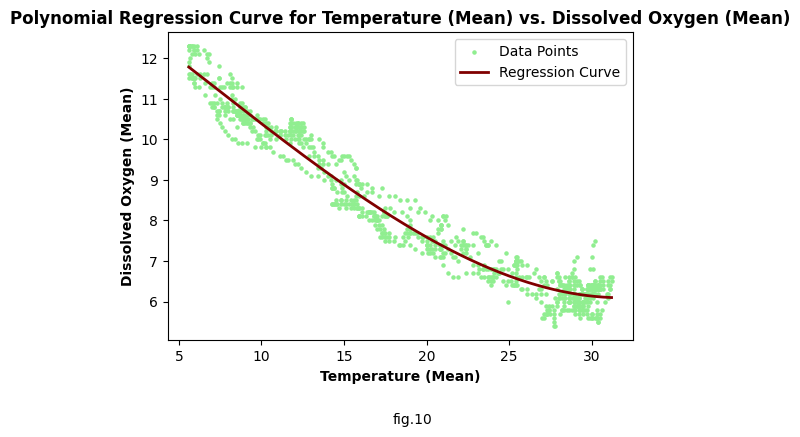

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

plt.figure(figsize=(6, 4))

x = df[['Temperature(Mean)']]
y = df[['Dissolved_Oxygen(Mean)']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

# Create the polynomial features
degree = 3  # Adjust the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict 'turbidity' for the test data
y_pred = model.predict(X_test_poly)

# Plot the scatter plot of test data
plt.scatter(x, y, label='Data Points', color='lightgreen', s=5)

# Generate a high-resolution range for x-values
x_values = np.linspace(min(x.values), max(x.values), 1000)  # Increase the number of points (e.g., 1000)

# Predict 'turbidity' for the high-resolution x-values
x_values_poly = poly_features.transform(x_values.reshape(-1, 1))
y_pred_curve = model.predict(x_values_poly)

# Plot the polynomial regression curve
plt.plot(x_values, y_pred_curve, label='Regression Curve', color='maroon', linewidth=2)

# Add labels and a title
plt.xlabel('Temperature (Mean)', fontsize=10, fontweight="bold")
plt.ylabel('Dissolved Oxygen (Mean)', fontsize=10, fontweight="bold")
plt.title('Polynomial Regression Curve for Temperature (Mean) vs. Dissolved Oxygen (Mean)', fontsize=12, fontweight="bold")

# Add a legend
plt.legend()

##Figure position
# Calculate the position for "Fig. 1" to move it closer to the graph
text_x = 0.5  # Centered horizontally
text_y = -0.10  # Closer to the graph

# Add "Fig. 1" closer to the figure
plt.figtext(text_x, text_y, "fig.10", fontsize=10, color='black')

plt.show()

#### **Residual Plot For Test Data using model**

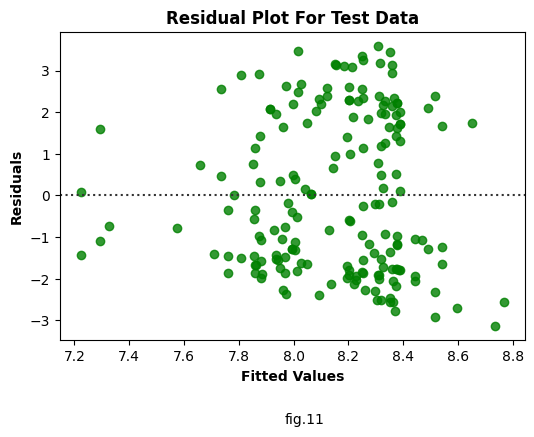

In [49]:
model.fit(x_test_poly, y_test)
# Calculate residuals
residuals = y_test - model.predict(x_test_poly)

# Create a residual plot
plt.figure(figsize=(6, 4))
sns.residplot(x=model.predict(x_test_poly), y=residuals, color='green')
plt.title('Residual Plot For Test Data', fontsize=12, fontweight="bold")
plt.xlabel('Fitted Values', fontsize=10, fontweight="bold")
plt.ylabel('Residuals', fontsize=10, fontweight="bold")



##Figure position
# Calculate the position for "Fig. 1" to move it closer to the graph
text_x = 0.5  # Centered horizontally
text_y = -0.10  # Closer to the graph

# Add "Fig. 1" closer to the figure
plt.figtext(text_x, text_y, "fig.11", fontsize=10, color='black')

plt.show()

#### **Residual Plot For Train Data using model**

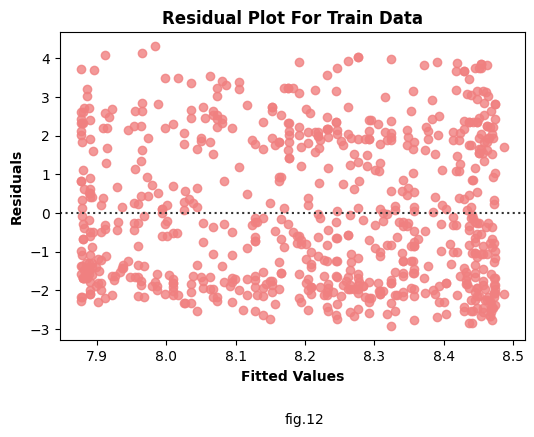

In [50]:
model.fit(x_train_poly, y_train)
# Calculate residuals
residuals = y_train - model.predict(x_train_poly)

# Create a residual plot
plt.figure(figsize=(6, 4))
sns.residplot(x=model.predict(x_train_poly), y=residuals, color='lightcoral')
plt.title('Residual Plot For Train Data', fontsize=12, fontweight="bold")
plt.xlabel('Fitted Values', fontsize=10, fontweight="bold")
plt.ylabel('Residuals', fontsize=10, fontweight="bold")

# Calculate the position for "Fig. 1" to move it closer to the graph
text_x = 0.5  # Centered horizontally
text_y = -0.10  # Closer to the graph

# Add "Fig. 1" closer to the figure
plt.figtext(text_x, text_y, "fig.12", fontsize=10, color='black')

plt.show()